In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [18]:
df = pd.read_csv(r"C:\Users\rishi\Downloads\archive\Iris.csv")

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.drop(['Id'], axis=1, inplace=True)

In [21]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Visualizations

### Histogram

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

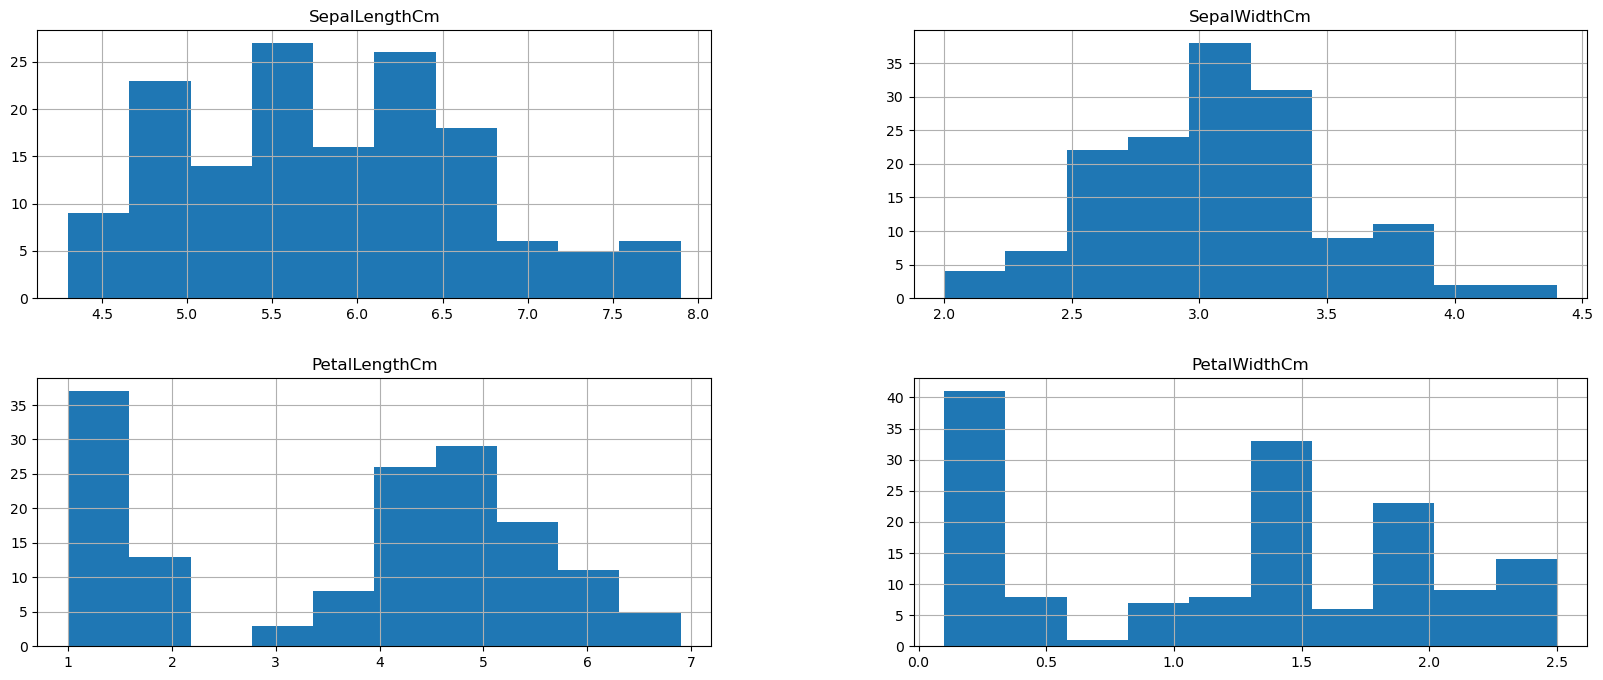

In [24]:
df.hist(figsize=(20, 8))

### Pairplot for feature visualization

C:\Users\rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


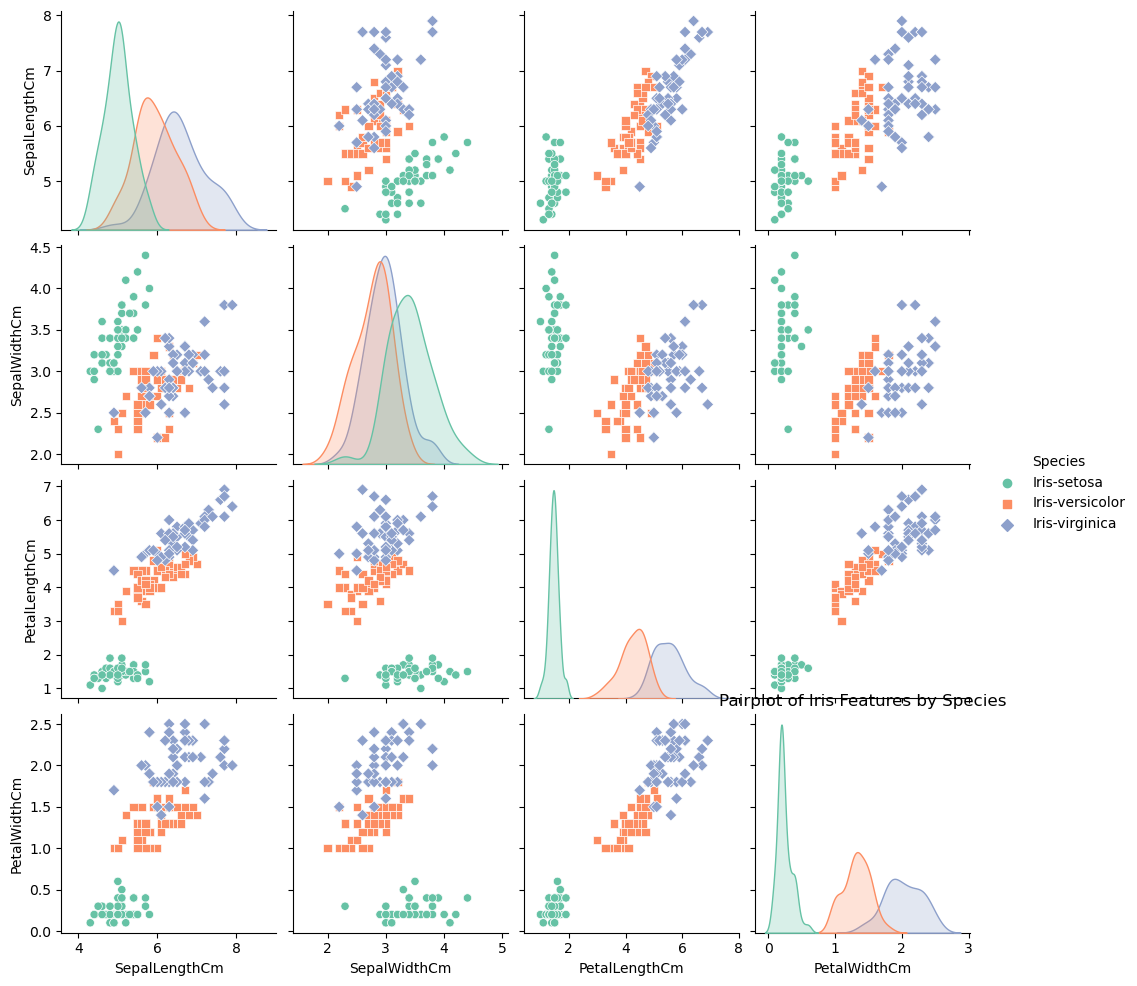

In [25]:
sns.pairplot(data=df, hue='Species', markers=['o', 's', 'D'], palette='Set2')
plt.title('Pairplot of Iris Features by Species')
plt.show()

### Pei Chart

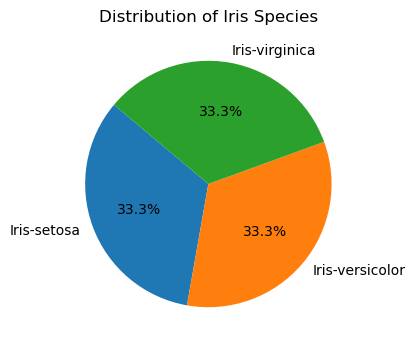

In [26]:
# Count the number of occurrences of each species
species_counts = df['Species'].value_counts()

# Extract the species names and their respective counts
species = species_counts.index
counts = species_counts.values

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 4))
plt.pie(counts, labels=species, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Iris Species')

# Show the pie chart
plt.show()


### Bar Chart

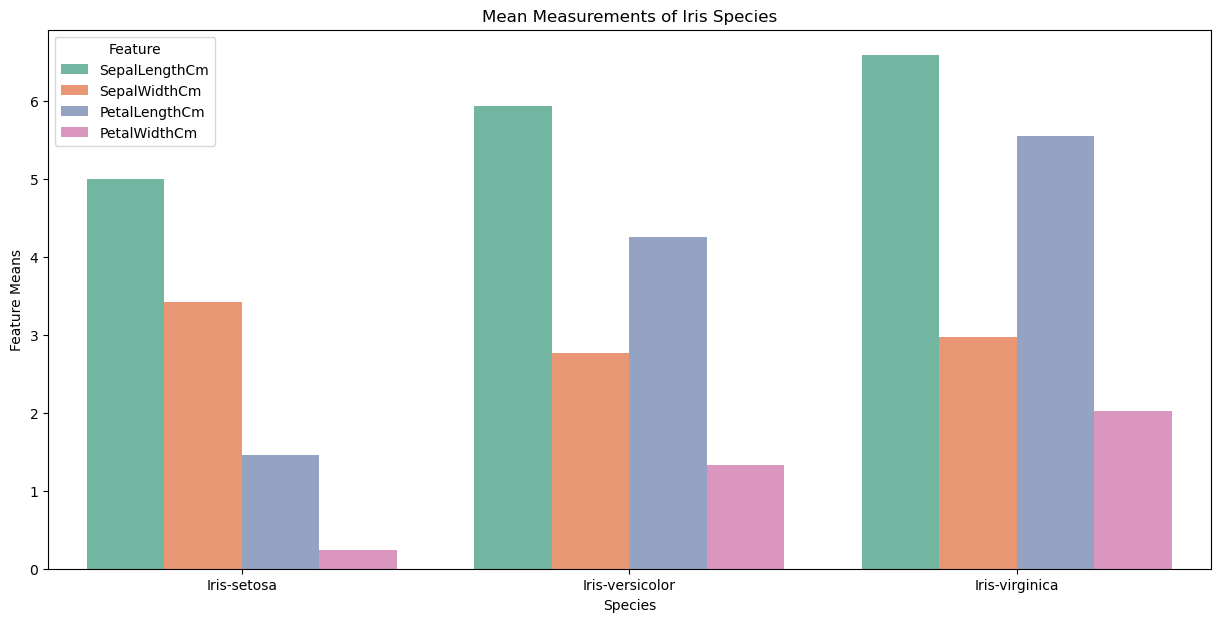

In [27]:
# Group data by 'Species' and calculate the mean of each feature
grouped_data = df.groupby('Species').mean().reset_index()

# Melt the data for Seaborn's barplot
melted_data = pd.melt(grouped_data, id_vars=['Species'], var_name='Feature', value_name='Mean')

# Define a custom color palette
custom_palette = sns.color_palette("Set2", len(melted_data['Feature'].unique()))

# Create a grouped bar chart using Seaborn with custom colors
plt.figure(figsize=(15, 7))
sns.barplot(x='Species', y='Mean', hue='Feature', data=melted_data, palette=custom_palette)

# Add labels and a legend
plt.xlabel('Species')
plt.ylabel('Feature Means')
plt.title('Mean Measurements of Iris Species')
plt.legend(title='Feature', loc='upper left')

# Show the chart
plt.show()

### Box plot

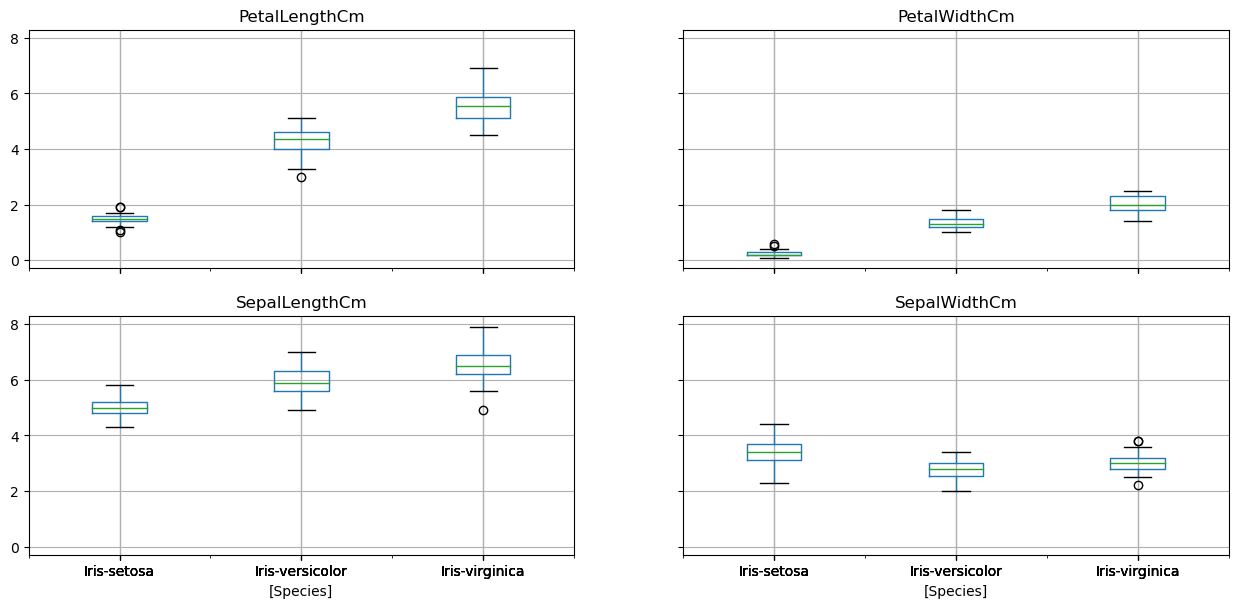

In [28]:
df.boxplot(by='Species', figsize=(15, 7))
plt.suptitle('')  
plt.show()

## A ML Model To Calassify the Data

In [29]:


# Split data into features and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize and train the SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

### Evaluate the model

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100 } %')

Accuracy: 100.0 %


### classification report

In [31]:
# Get the classification report as a string
report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report_str).transpose()
report_df

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,8.0
Iris-versicolor,1.0,1.0,1.0,12.0
Iris-virginica,1.0,1.0,1.0,10.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


### Confusion Matrix

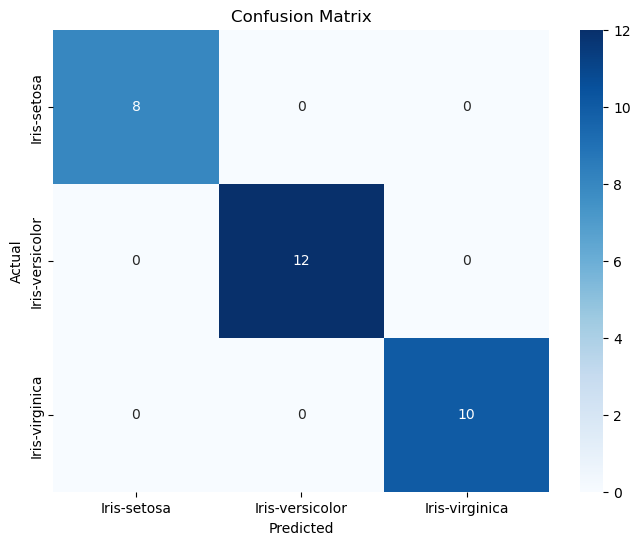

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()